## ANOVA TESTS for changes in meal delivery app
### Task 1. We changed meal pictures sizw and quality in our app. We showed romb shape pictures to "A" group of users, square sized pictures to group "B" and not changed variant to "C". 

### Task 1. В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 

In [1]:
# Importing needed libraries 
# Загружаем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy. stats import ttest_ind
import pingouin as pg


%matplotlib inline

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
# Reading our file with pandas
# Считываем наш файл

task_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-lavrukhin/5_task_1.csv')
task_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-lavrukhin/5_task_2.csv')

In [4]:
# Quick look to our data

task_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


### Step A

#### Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.
#### Checki if our groups have homogen dispersion with Leven test

In [4]:
gr_A = task_1.query('group == "A"').events

In [5]:
gr_B = task_1.query('group == "B"').events

In [6]:
gr_C = task_1.query('group == "C"').events

In [7]:
# H0 - all input samples are from populations with equal variances
# H1 - all input samples are from populations with diff variances

ss.levene(gr_A, gr_B, gr_C)

# pvalue=0.104 shows that we can't deny our H0 

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

#### *Вывод* : дисперсии внутри групп являются гомогенными
#### *Result* : dispersions are homogen

### Step B

### Checkig if our distributions are normal

In [8]:
# Preparing our data and using our D’Agostino - Pearson test.
# Используем тест Агостино-Пирсона для проверки наших распределений на нормальное.

gr_A = task_1.query('group == "A"').events

ss.stats.normaltest(gr_A)

# H0 - our distribution is normal
# H1 - our distribution is not normal

# pvalue=0.349 shows that we can't deny our H0 

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [9]:
# Preparing our data and using our D’Agostino - Pearson test.
# Используем тест Агостино-Пирсона для проверки наших распределений на нормальное.

gr_B = task_1.query('group == "B"').events

ss.stats.normaltest(gr_B)

# H0 - our distribution is normal
# H1 - our distribution is not normal

# pvalue=0.657 shows that we can't deny our H0  

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [10]:
# Preparing our data and using our D’Agostino - Pearson test.
# Используем тест Агостино-Пирсона для проверки наших распределений на нормальное.

gr_C = task_1.query('group == "C"').events

ss.stats.normaltest(gr_C)

# H0 - our distribution is normal
# H1 - our distribution is not normal

# pvalue=0.197 shows that we can't deny our H0 

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

### Step C. Perform one-way ANOVA

In [11]:
# Для сравнения средних я использую ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ 

ss.stats.f_oneway(gr_A, gr_B, gr_C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

### Step D. Perform Tukey Test

In [12]:
## Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия.

pg.pairwise_tukey(data=task_1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


### Step E. Perform Games-Showell Test

In [13]:
pg.pairwise_gameshowell(data=task_1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,0.001,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,0.001,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.001,1.024138


### Finall Step. 

## Result: As we can see in our tests, difference between our groups is statisticaly significant and we should pick group "B". 

In [14]:
task_1.groupby('group').agg({'events':'sum'})

,events
group,
A,295796
B,376136
C,274703


## Task 2 

### Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента. Какой вариант кнопки нам нужно оставить в приложении. 

##### TEST group - new interface. CONTROL - old interface.

### In this task we should say if difference between our groups is statisticaly significant and what format of our "ORDER" button should we apply. 

#####  TEST group - новый вариант кнопки. CONTROL - старый вариант.

In [6]:
# Quick look to our data

task_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


### Step A. Visualising our distributions

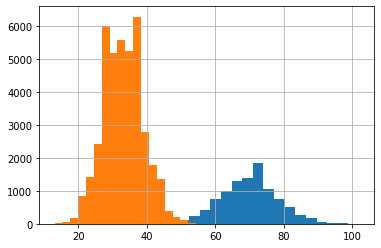

In [9]:
# At first we should filter by our experimental group type and then group by region and finaly creating our histogram by delivery time.
# Для начала отфильтруем по контрольной группе, сгруппируем по району города и затем построим гисторграмму по веремени доставки. 

test_group = task_2.query('group =="test"').groupby('segment')['events'].hist(bins=20)

# Our hist for "test" group

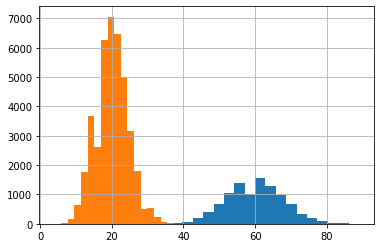

In [26]:
# At first we should filter by our experimental group type and then group by region and finaly creating our histogram by delivery time.
# Для начала отфильтруем по контрольной группе, сгруппируем по району города и затем построим гисторграмму по веремени доставки. 

control_group = task_2.query('group =="control"').groupby('segment')['events'].hist(bins=20)

# Our hist for "control" group

### Step B. Calculating 'std', 'mean', 'median' by our segments.

In [46]:
task_2.query('group =="control"').groupby('segment')['events'].agg(['std', 'mean', 'median']).reset_index()

,segment,std,mean,median
0,high,7.805347,59.970800,60.0
1,low,4.473576,20.031575,20.0


### Step C. Perform ANOVA Test

In [31]:
# Want to check the effect of two veriables - group и segment – for events, with factors interaction.
# хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов.

pg.anova(data=task_2, dv="events", between=["group", "segment"])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


### Step D. Perform Tukey Test

In [39]:
# Performing Tukey test to check if our diff between groups stats significant.

pg.pairwise_tukey(data=task_2, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control,test,28.01942,40.40844,-12.38902,0.10409,-119.021936,0.001,-0.752755


In [10]:
# Understanding the diff

task_2.groupby('group')['events'].agg(['sum']).reset_index()

,group,sum
0,control,1400971.0
1,test,2020422.0


In [11]:
# Understanding the diff

task_2.groupby(['segment', 'group'])['events'].agg(['sum']).reset_index()

,segment,group,sum
0,high,control,599708.0
1,high,test,699385.0
2,low,control,801263.0
3,low,test,1321037.0


### Step E. FINALL TUKEY TEST

In [15]:
# Making it more convinient to compare and creatin new column by concatenating column "group" and "segment"
# В данном случае для последующих сравнений между группами можно соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в наших тестах.

task_2['combination'] = task_2.group + ' // ' + task_2.segment

In [16]:
# Checking if new column looks good
# Посмотрим все ли у нас хорошо получилось

task_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test // high
1,96723,test,high,71.0,test // high
2,68719,test,high,80.0,test // high
3,50399,test,high,80.0,test // high
4,95613,test,high,78.0,test // high


In [18]:
# Performing Tukey test to help us make finall descision.  

pg.pairwise_tukey(data=task_2, dv="events", between="combination")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control // high,control // low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control // high,test // high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control // high,test // low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control // low,test // high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control // low,test // low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test // high,test // low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


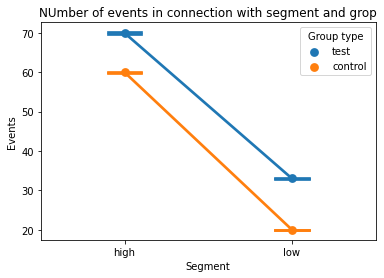

In [21]:
# Visualising our test

sns.pointplot(x = 'segment', y = 'events', hue = 'group', data = task_2, capsize = .2)
plt.title('NUmber of events in connection with segment and grop')
plt.xlabel('Segment')
plt.ylabel('Events')
plt.legend(title = 'Group type')

## FINAL RESULT

## Factor 'group' is significant, factor 'segmet' is significant and their cooperation is significant. According to our pointplot means in "Test group" increased and that is way we should go for NEW (test) version.

## Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО. Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ.